In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load dataset
columns = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance',
           'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification",
           "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced',
           'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
           'Age at enrollment', 'International', 'Curricular units 1st sem (credited)',
           'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
           'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
           'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)',
           'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
           'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',
           'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']

df = pd.read_csv("/content/drive/MyDrive/AIML_Project/rawDataset.csv", sep=';', names=columns, header=0)

In [5]:
# Quick check
print(df.shape)
print(df.head())

(4424, 37)
   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                          

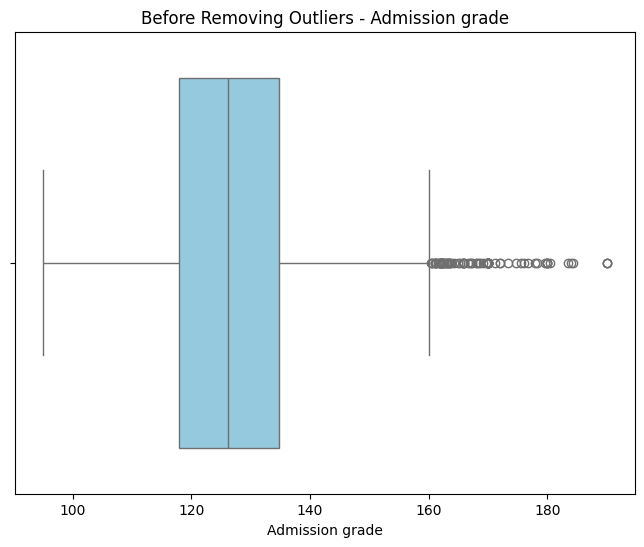

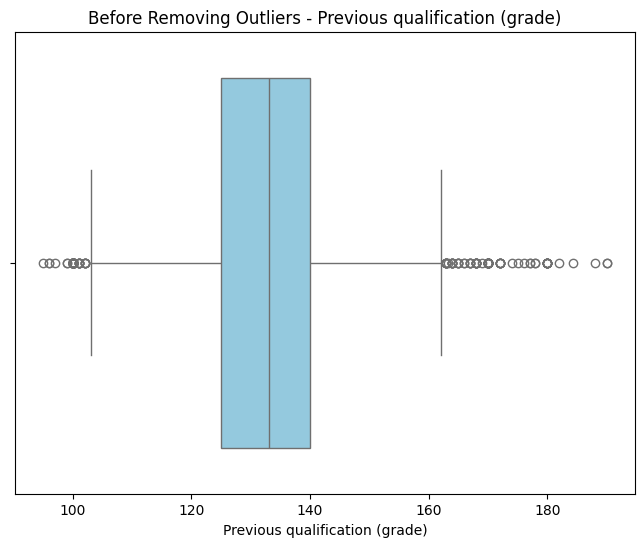

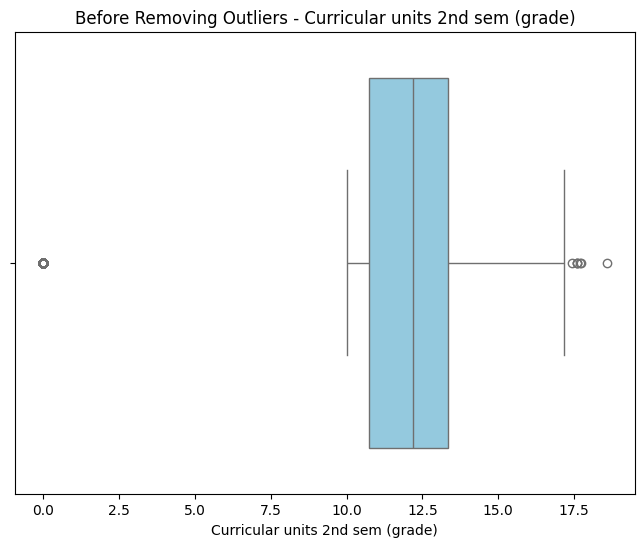

In [15]:
# 🔹 Function to remove outliers
# ------------------------------
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# remove outliers from "Admission grade"
col1 = "Admission grade"

# ------------------------------
# 🔹 Boxplot BEFORE removing outliers
# ------------------------------
plt.figure(figsize=(8,6))
sns.boxplot(x=df[col1], color="skyblue")
plt.title(f"Before Removing Outliers - {col1}")
plt.savefig("/content/drive/MyDrive/AIML_Project/Admissiongrade_boxplot_before.png")  # save plot
plt.show()

# remove outliers from "Previous qualification (grade)"
col2 = "Previous qualification (grade)"

# ------------------------------
# 🔹 Boxplot BEFORE removing outliers
# ------------------------------
plt.figure(figsize=(8,6))
sns.boxplot(x=df[col2], color="skyblue")
plt.title(f"Before Removing Outliers - {col2}")
plt.savefig("/content/drive/MyDrive/AIML_Project/Previous qualification_boxplot_before.png")  # save plot
plt.show()

# remove outliers from "Curricular units 2nd sem (grade)"
col3 = "Curricular units 2nd sem (grade)"

# ------------------------------
# 🔹 Boxplot BEFORE removing outliers
# ------------------------------
plt.figure(figsize=(8,6))
sns.boxplot(x=df[col3], color="skyblue")
plt.title(f"Before Removing Outliers - {col3}")
plt.savefig("/content/drive/MyDrive/AIML_Project/Curricular units 2nd sem (grade)_boxplot_before.png")  # save plot
plt.show()

In [16]:
# Remove outliers
df_clean = remove_outliers_iqr(df, "Admission grade")
df_clean = remove_outliers_iqr(df, "Previous qualification (grade)")
df_clean = remove_outliers_iqr(df, "Curricular units 2nd sem (grade)")

# Apply the IQR rule repeatedly until no outliers remain
#Strict removal
df_clean = df.copy()
while True:
    before = df_clean.shape[0]
    df_clean = remove_outliers_iqr(df_clean, col)
    after = df_clean.shape[0]
    if before == after:   # stop when no rows are removed
        break


print("Before:", df.shape)
print("After :", df_clean.shape)


Before: (4424, 37)
After : (3536, 37)


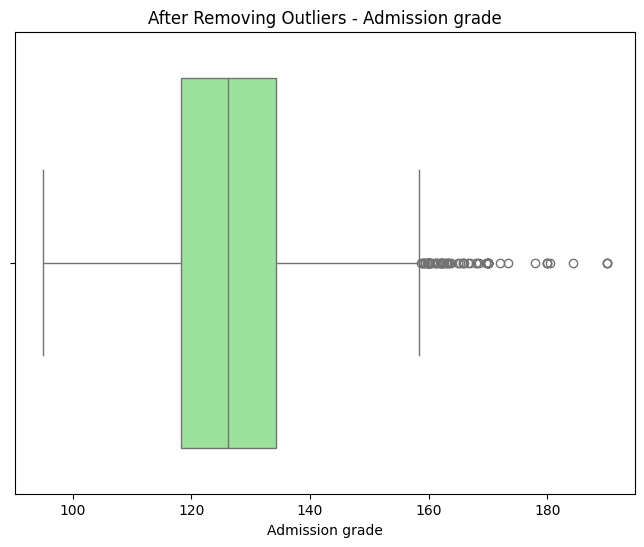

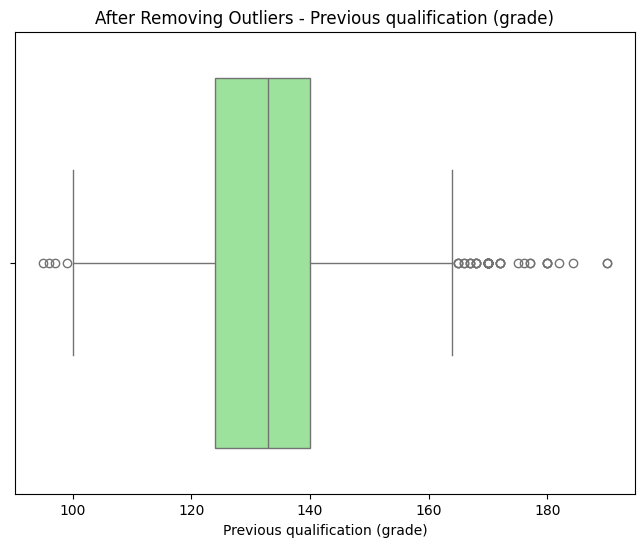

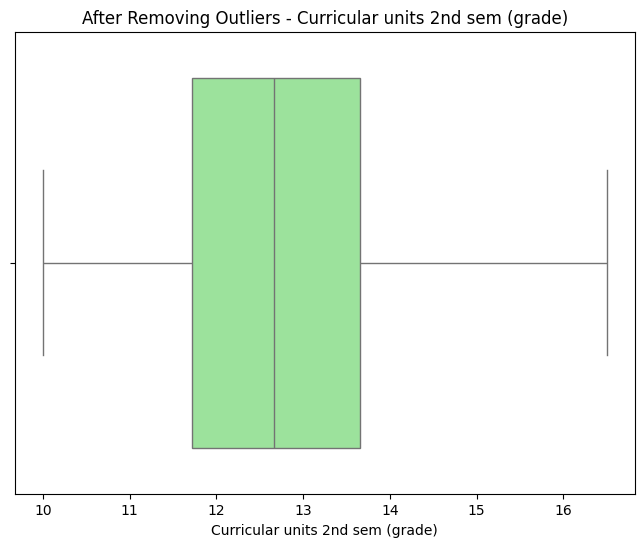

In [19]:
# 🔹 Boxplot AFTER removing outliers
# ------------------------------
plt.figure(figsize=(8,6))
sns.boxplot(x=df_clean[col1], color="lightgreen")
plt.title(f"After Removing Outliers - {col1}")
plt.savefig("/content/drive/MyDrive/AIML_Project/Admission grade_boxplot_after.png")  # save plot
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x=df_clean[col2], color="lightgreen")
plt.title(f"After Removing Outliers - {col2}")
plt.savefig("/content/drive/MyDrive/AIML_Project/Previous qualification (grade)_boxplot_after.png")  # save plot
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x=df_clean[col3], color="lightgreen")
plt.title(f"After Removing Outliers - {col3}")
plt.savefig("/content/drive/MyDrive/AIML_Project/Curricular units 2nd sem (grade)_boxplot_after.png")  # save plot
plt.show()